In [26]:
import numpy as np

initial walker lacation: [ 0.13667995 -0.1379629 ]


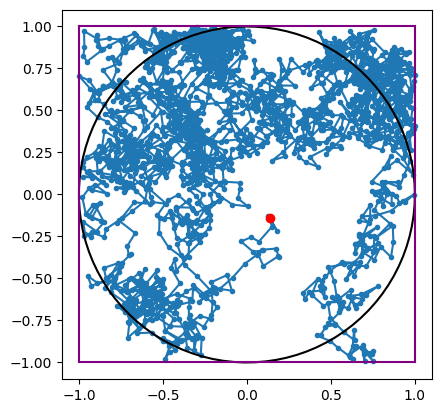

walker 46 located at [-0.70124287 -0.71523042] is outside the unit circle
walker 50 located at [-0.70570662 -0.76125159] is outside the unit circle
walker 51 located at [-0.6973981  -0.73411059] is outside the unit circle
walker 52 located at [-0.64332952 -0.79683568] is outside the unit circle
walker 59 located at [-0.88989304 -0.52630919] is outside the unit circle
walker 60 located at [-0.94815469 -0.48500826] is outside the unit circle
walker 61 located at [-0.9258579  -0.54315775] is outside the unit circle
walker 66 located at [-0.84215755 -0.55746462] is outside the unit circle
walker 75 located at [-0.70929415 -0.85304203] is outside the unit circle
walker 76 located at [-0.69985438 -0.76700166] is outside the unit circle
walker 78 located at [-0.69495396 -0.74675266] is outside the unit circle
walker 80 located at [-0.72761255 -0.69909949] is outside the unit circle
walker 81 located at [-0.77472525 -0.66185048] is outside the unit circle
walker 185 located at [-0.84919629  0.

In [117]:
init_walker = np.random.uniform(-1,1,2)
print(f'initial walker lacation: {init_walker}')
nsteps = 2000
walkers = np.empty((nsteps,2))
step_size = 0.1
walkers[0] = init_walker
for i in range(nsteps-1):
    walkers[i+1] = walkers[i]+step_size*(np.random.uniform(-1,1,2))
    while abs(walkers[i+1][0])>1 or abs(walkers[i+1][1])>1:
        walkers[i+1] = walkers[i]+step_size*(2*np.random.random(2)-1)

from matplotlib import pyplot as plt
theta = np.linspace(0, 2 * np.pi, 100)
x_cir = np.cos(theta)
y_cir = np.sin(theta)
sqr_1 = np.ones(100)
sqr_2 = np.linspace(-1,1,100)
plt.plot(walkers[:,0],walkers[:,1],marker='.')
plt.plot(walkers[0,0],walkers[0,1],color='red',marker='o')
plt.plot(x_cir,y_cir,color='black')
plt.plot(sqr_1,sqr_2,color='purple')
plt.plot(sqr_2,sqr_1,color='purple')
plt.plot(-sqr_1,sqr_2,color='purple')
plt.plot(sqr_2,-sqr_1,color='purple')
plt.gca().set_aspect('equal')
plt.show()

count = 0
for i,walker in enumerate(walkers):
    if walker[0]**2+walker[1]**2 < 1:
        count+=1
    else:
        print(f'walker {i} located at {walker} is outside the unit circle')
print(count)
area = count/nsteps*4
print(area)

In [140]:
def estimate_area(walkers):
    count = [(x**2 + y**2 < 1) for x, y in walkers]
    int_count = [int(b) for b in count]
    int_count = np.array(int_count)
    area = sum(int_count)/int_count.size*4
    return area

In [139]:
count = [(x**2 + y**2 < 1) for x, y in walkers]
int_count = [int(b) for b in count]
int_count = np.array(int_count)
sum(int_count)/int_count.size*4

3.252

In [155]:
block_size = 100
nblocks = int(nsteps/block_size)
block_count = np.empty((nblocks))
for i in range(nblocks):
    block_ave = sum(int_count[block_size*i:block_size*(i+1)])/block_size
    if block_ave > 1/2:
        block_count[i] = 1
    else:
        block_count[i] = 0

print(sum(block_count)/block_count.size*4)

3.8
